In [107]:
# Copyright (c) Microsoft Corporation. All rights reserved.
# Licensed under the MIT License.

### Install Dependencies

In [108]:
pip install pandas==1.3.5 requests==2.28.2 matplotlib=3.8.2 numpy==1.26.3 scipy==1.11.4

You should consider upgrading via the 'C:\Users\jajod\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


### Import Libraries

In [109]:
import os
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random

### Load & Explore Data

Download and unzip the 'CHI2017_Krupka_and_Karmon_v1.zip' file from the below link to then save it locally in the same folder as this notebook file.

https://www.microsoft.com/en-us/download/details.aspx?id=55328

### Fingers Dataset

Print the first 5 'PerFrame' fingers data structure and image related to each one

### PerFrame fingers data 1

3x5 matrix (the i’th column is the coordinates of the i'th finger in 3D camera coordinates)
            0           1           2           3           4
0  -80.070503 -100.482124  -60.214340  -46.529736  -45.683319
1  115.335503   96.009880  144.885849  122.965073   82.605011
2  407.523712  417.775604  346.124786  337.126831  332.302582

2x5 matrix (the i’th column is the coordinates of the i'th finger in 2D image coordinates)
            0           1           2           3           4
0  220.897323  200.141802  232.386810  248.550711  248.211940
1  377.992247  353.269648  438.796957  415.291142  362.515135


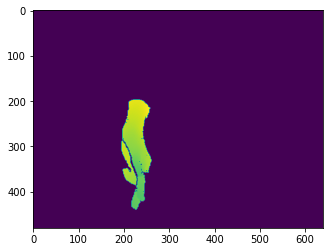

### PerFrame fingers data 2

3x5 matrix (the i’th column is the coordinates of the i'th finger in 3D camera coordinates)
            0           1           2           3           4
0  -38.686474  -63.545891  -89.245445  -93.003746  -85.681145
1   51.929947   47.309887   35.584560   47.192905   12.379708
2  286.273315  288.321106  305.217834  313.929047  319.191956

2x5 matrix (the i’th column is the coordinates of the i'th finger in 2D image coordinates)
            0           1           2           3           4
0  251.274992  211.136695  177.539567  175.941707  188.379958
1  320.094387  311.587688  288.934818  304.724752  252.328439


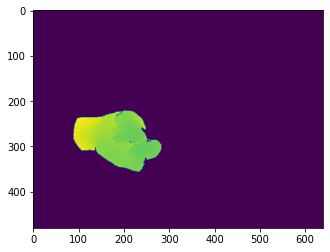

### PerFrame fingers data 3

3x5 matrix (the i’th column is the coordinates of the i'th finger in 3D camera coordinates)
            0           1           2           3           4
0  -12.933406  -59.153542  -69.695900  -43.631592  -62.054203
1   79.314339   60.761383   47.219193   25.795763   23.439941
2  301.162323  300.505188  315.540222  289.551636  310.895569

2x5 matrix (the i’th column is the coordinates of the i'th finger in 2D image coordinates)
            0           1           2           3           4
0  295.155968  222.345533  210.842801  243.652032  220.554627
1  358.595485  329.553220  304.802374  276.398863  269.793188


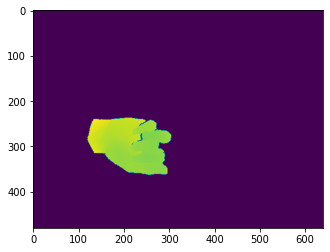

### PerFrame fingers data 4

3x5 matrix (the i’th column is the coordinates of the i'th finger in 3D camera coordinates)
            0           1           2           3           4
0    1.234259   20.938374   22.026733   18.038403   11.020325
1  -27.548225   -9.428157  -22.520842  -18.396227  -11.896804
2  265.893768  278.744354  308.684479  321.995728  329.519470

2x5 matrix (the i’th column is the coordinates of the i'th finger in 2D image coordinates)
            0           1           2           3           4
0  309.394361  342.562652  340.771098  333.578866  322.969289
1  205.331888  238.236986  219.794357  227.237871  237.145839


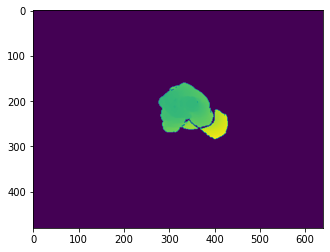

### PerFrame fingers data 5

3x5 matrix (the i’th column is the coordinates of the i'th finger in 3D camera coordinates)
            0           1           2           3           4
0 -102.197624  -95.923248  -81.673737  -92.511192  -57.981598
1  -33.703720  -10.944452   18.521381   26.657173   19.596844
2  391.854462  401.137604  397.649567  391.236877  384.085999

2x5 matrix (the i’th column is the coordinates of the i'th finger in 2D image coordinates)
            0           1           2           3           4
0  181.923904  191.757464  207.404931  192.888138  233.007971
1  235.606387  263.209691  298.193262  308.433461  300.289775


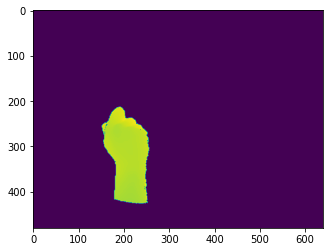

In [110]:
# Load finger dataset 
print("Print the first 5 'PerFrame' fingers data structure and image related to each one")
print("")
finger_dataset = scipy.io.loadmat('CHI2017_Krupka_and_Karmon_v1/FingersData/data.mat', struct_as_record=False)
for i in range(5):
    print("### PerFrame fingers data %s" % (i+1))

    # LandmarksXyzMm array
    landmarks_xyz_mm_array = finger_dataset['PerFrame'][0][i].LandmarksXyzMm
    df = pd.DataFrame(landmarks_xyz_mm_array, columns = ['0','1','2','3','4'])
    print("")
    print("3x5 matrix (the i’th column is the coordinates of the i'th finger in 3D camera coordinates)")
    print(df)

    # LandmarksImagePixel array
    landmarks_image_pixel_array = finger_dataset['PerFrame'][0][i].LandmarksImagePixel
    df = pd.DataFrame(landmarks_image_pixel_array, columns = ['0','1','2','3','4'])
    print("")
    print("2x5 matrix (the i’th column is the coordinates of the i'th finger in 2D image coordinates)")
    print(df)

    depth_file_name = finger_dataset['PerFrame'][0][i].DepthFileName
    depth_file_name_path = depth_file_name.tolist()[0]
    img = mpimg.imread(os.path.join('CHI2017_Krupka_and_Karmon_v1/FingersData', depth_file_name_path))
    imgplot = plt.imshow(img)
    plt.show()





### Gestures Dataset

In [111]:
# Load gestures dataset
gestures_dataset = scipy.io.loadmat('CHI2017_Krupka_and_Karmon_v1/GestureClips/data.mat', struct_as_record=False)

In [112]:
# First Clip
print('\n')
print("Take the first 'Clip'")
print('\n')
print("Print the 'Clip' frames indices:")
clip_frames_array = gestures_dataset['PerClip'][0][0].FrameInds[0].tolist()
print('-----------------------------------------------------------------------------')
print(clip_frames_array)
print('-----------------------------------------------------------------------------')
print('\n')

gestures_ground_truth_mat_struct = gestures_dataset['PerClip'][0][0].GesturesGroundTruth
x_dataset = [[x.Name[0], x.GestureName[0], x.StartFrame[0,0], x.EndFrame[0,0], x.IsTerminal[0,0], x.IsBad[0,0]] for x in gestures_ground_truth_mat_struct[0]]
data_frame = pd.DataFrame(x_dataset, columns=['Name', 'GestureName', 'StartFrame', 'EndFrame', 'IsTerminal', 'IsBad'])
print("Print the 'Clip' Gestures Ground Truth data structure ")
print('\n')
print('-----------------------------------------------------------------------------')
print(data_frame.head(15))
print('-----------------------------------------------------------------------------')



Take the first 'Clip'


Print the 'Clip' frames indices:
-----------------------------------------------------------------------------
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 



Print the first 5 random 'Frame' gesture images related to the first 'Clip'
------------------------------------------------
['Clip_00001\\Frame_00374_depth.png']
------------------------------------------------


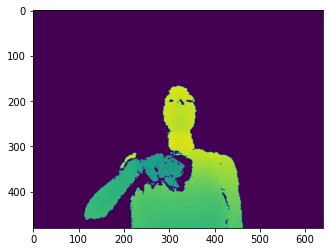

------------------------------------------------
['Clip_00001\\Frame_00290_depth.png']
------------------------------------------------


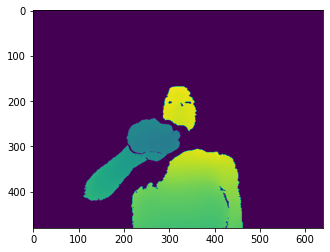

------------------------------------------------
['Clip_00001\\Frame_00401_depth.png']
------------------------------------------------


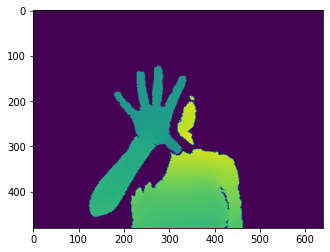

------------------------------------------------
['Clip_00001\\Frame_00551_depth.png']
------------------------------------------------


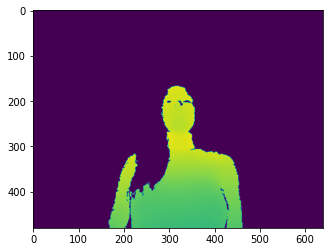

------------------------------------------------
['Clip_00001\\Frame_00221_depth.png']
------------------------------------------------


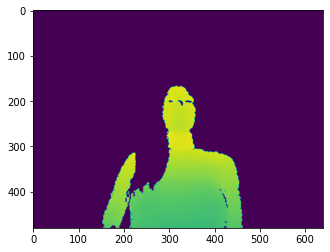

In [113]:
# Frames for the First Clip
print('\n')
print("Print the first 5 random 'Frame' gesture images related to the first 'Clip'")
for i in range(5):
    depth_file_name = gestures_dataset['PerFrame'][0][random.choice(clip_frames_array)].DepthFileName
    print('------------------------------------------------')
    print(depth_file_name)
    print('------------------------------------------------')
    depth_file_name_path = depth_file_name.tolist()[0]
    img = mpimg.imread(os.path.join('CHI2017_Krupka_and_Karmon_v1/GestureClips', depth_file_name_path))
    imgplot = plt.imshow(img)
    plt.show()